Import Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/media_data.csv', encoding='utf-8')
data.head()

Title  Runtime Release Date Certification             Genres  \
0     성냥공장 소녀     69.0   1990-01-12           15세           코미디, 드라마   
1     키다리 아저씨      0.0   1990-01-14            전체    코미디, 애니메이션, 드라마   
2  주윤발의 행운의 별     90.0   1990-01-18           15세  코미디, 로맨스, 로맨틱 코미디   
3        부귀병단     89.0   1990-01-19           15세            코미디, 액션   
4        불가사리     96.0   1990-01-19           15세    SF, 액션, 공포, 코미디   

  Origin Country                                           Overview  \
0            핀란드  무능력하고 무표정한 얼굴의 엄마와 계부의 생활비를 위해 매일같이 성냥공장에서 기계처...   
1             일본  고아이지만 언제나 밝은 주디와 그런 주디를 도와주는 후견인 '키다리 아저씨'의 사랑...   
2             홍콩  재벌가 도련님 임보생은 재산 상속권을 조건으로 육촌 동생 진옥선과의 혼인을 강요당한...   
3             홍콩  1940년대 초, 일본의 침공으로 전 중국이 혼란에 빠져있을 무렵, 중국내 일본의 ...   
4             미국  네바다주 사막 한 가운데 있는 작은 마을에는 20명도 안되는 주민들이 서로 도우며 ...   

    Director                                               Cast  \
0  아키 카우리스마키  Kati Outinen, Elina Salo, Esko Nikkari, Vesa V...   
1        NaN  Mitsuko Horie, 島田敏, 佐藤智恵, 田中秀幸, 天野由梨, 鶴ひろみ, 増岡...   
2        두기봉  주윤발, 장애가, 리지, Lawrence Cheng, Wong Kwan-Yuen, ...   
3        정칙사  유덕화, 홍금보, 증지위, 성규안, 정칙사, 알란 탐, 매염방, 막소총, 종발, 유...   
4     론 언더우드  케빈 베이컨, Fred Ward, Finn Carter, Michael Gross,...   

              Providers  Rating Value  Rating Count  \
0         wavve, watcha           3.8          5278   
1  watcha, wavve, tving           4.2          1623   
2         wavve, watcha           3.2           184   
3  tving, wavve, watcha           2.9           128   
4                   NaN           3.3         61592   

                                          Poster URL  \
0  https://image.tmdb.org/t/p/original/zHfabvr3RK...   
1  https://image.tmdb.org/t/p/original/2L7IZ1mtXF...   
2  https://image.tmdb.org/t/p/original/ueCbq0Ed1O...   
3  https://image.tmdb.org/t/p/original/fZH9zzIiEy...   
4  https://image.tmdb.org/t/p/original/cA4ggkZ3r1...   

                                       Backdrop URLs  
0  https://image.tmdb.org/t/p/original/tHF5OIcguu...  
1  https://image.tmdb.org/t/p/original/6ve31bSQjl...  
2  https://image.tmdb.org/t/p/original/y4cbGUuSZp...  
3  https://image.tmdb.org/t/p/original/xn6PLzCsaP...  
4  https://image.tmdb.org/t/p/original/3L3DUwfRLW...

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18405 entries, 0 to 18404
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           18405 non-null  object 
 1   Runtime         18405 non-null  float64
 2   Release Date    18405 non-null  object 
 3   Certification   15783 non-null  object 
 4   Genres          18405 non-null  object 
 5   Origin Country  18334 non-null  object 
 6   Overview        18405 non-null  object 
 7   Director        15274 non-null  object 
 8   Cast            17855 non-null  object 
 9   Providers       16331 non-null  object 
 10  Rating Value    18405 non-null  float64
 11  Rating Count    18405 non-null  int64  
 12  Poster URL      18405 non-null  object 
 13  Backdrop URLs   18405 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 2.0+ MB
None


# Data Preprocessing

In [4]:
# 필요한 컬럼만 선택
selected_columns = ['Title', 'Genres', 'Overview', 'Origin Country', 'Providers', 'Rating Value', 'Rating Count']
data_selected = data[selected_columns]
print(data_selected.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18405 entries, 0 to 18404
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           18405 non-null  object 
 1   Genres          18405 non-null  object 
 2   Overview        18405 non-null  object 
 3   Origin Country  18334 non-null  object 
 4   Providers       16331 non-null  object 
 5   Rating Value    18405 non-null  float64
 6   Rating Count    18405 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 1006.6+ KB
None


In [5]:
na_origin_country = data_selected['Title'][data_selected['Origin Country'].isnull()]
print(na_origin_country)

240                     내일은 사랑
756                  내 마음을 뺏어봐
935               부부클리닉 사랑과 전쟁
1110                  난세영웅 여불위
1293                      햇빛사냥
                 ...          
14307               카우보이로 사는 법
14383                   도쿄방치식당
14508           배드 스포츠: 조작된 승부
14898    별빛 히어로 스타빔: 우당탕탕 새해맞이
14943          크리스마스로부터 1000km
Name: Title, Length: 71, dtype: object


In [6]:
na_providers = data_selected['Title'][data_selected['Providers'].isnull()]
print(na_providers)

4                    불가사리
13                 붉은 10월
15                  파리 대왕
19                 귀여운 여인
25             뒤로 가는 남과 여
               ...       
18283              그날의 딸들
18289    호랑이의 후예: 새로운 수호자
18361          살아 있는 모든 것
18378              비치 보이스
18404                원더랜드
Name: Title, Length: 2074, dtype: object


In [7]:
# # Origin Country 결측값 처리
# replacement_values = [
#     '한국', '홍콩', '홍콩, 미국, 말레이시아', '한국', '한국', '미국', '중국',
#     '한국', '호주', '한국', '한국', '중국', '중국', '한국', '한국', '한국',
#     '한국', '한국', '일본', '미국', '스페인'
# ]

# # 결측값이 있는 행들의 인덱스
# missing_indices = data_selected[data_selected['Origin Country'].isnull()].index

# # 결측값 대체
# for idx, value in zip(missing_indices, replacement_values):
#     data_selected.at[idx, 'Origin Country'] = value

# # 결측값 처리 확인
# print(data_selected.loc[missing_indices, ['Title', 'Origin Country']])
# print(data_selected.info())

In [8]:
# 결측값을 공백으로 채우기
data_selected = data_selected.copy()
data_selected['Origin Country'].fillna('', inplace=True)
data_selected['Providers'].fillna('', inplace=True)

print(data_selected.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18405 entries, 0 to 18404
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           18405 non-null  object 
 1   Genres          18405 non-null  object 
 2   Overview        18405 non-null  object 
 3   Origin Country  18405 non-null  object 
 4   Providers       18405 non-null  object 
 5   Rating Value    18405 non-null  float64
 6   Rating Count    18405 non-null  int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 1006.6+ KB
None


In [9]:
# 데이터 저장
data_selected.to_csv('/content/data_preprocessed.csv', index=False)

# EDA

In [10]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [11]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [13]:
print(data_selected['Genres'].unique())

['코미디, 드라마' '코미디, 애니메이션, 드라마' '코미디, 로맨스, 로맨틱 코미디' ...
 'SF, 애니메이션, Action & Adventure, Sci-Fi & Fantasy, 액션, 모험, Kids, 가족, 키즈'
 'Sci-Fi & Fantasy, 드라마, 액션, 미스터리, TV드라마, 모험' '전기, 스포츠, 드라마, TV드라마']


In [14]:
# 복합 장르를 개별 장르로 분리
all_genres = data_selected['Genres'].str.split(', ')
flat_genres = [genre for sublist in all_genres for genre in sublist]

# 개별 장르의 빈도 계산
genre_counts = Counter(flat_genres)

# 개별 장르의 빈도를 DataFrame으로 변환
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

In [15]:
# unique genres 확인
unique_genres = pd.unique(flat_genres)
print(unique_genres)

# unique genres 개수
unique_genres_count = len(unique_genres)
print(f'고유 장르 개수: {unique_genres_count}')

['코미디' '드라마' '애니메이션' '로맨스' '로맨틱 코미디' '액션' 'SF' '공포' '판타지' '미스터리' '스릴러'
 '범죄' '모험' '' '역사' '가족' '스포츠' '전기' '전쟁' '시대극' 'Kids' 'Sci-Fi & Fantasy'
 '음악' '다큐멘터리' 'Action & Adventure' 'War & Politics' 'TV드라마' '키즈' '뮤지컬'
 'Talk' '시사교양' '서부' '서부극' 'TV 영화' '예능' '단편' '틴에이저' '재난' '시트콤' 'Reality'
 '공연실황' 'BL' '일상' 'Soap' 'News' 'GL']
고유 장르 개수: 46


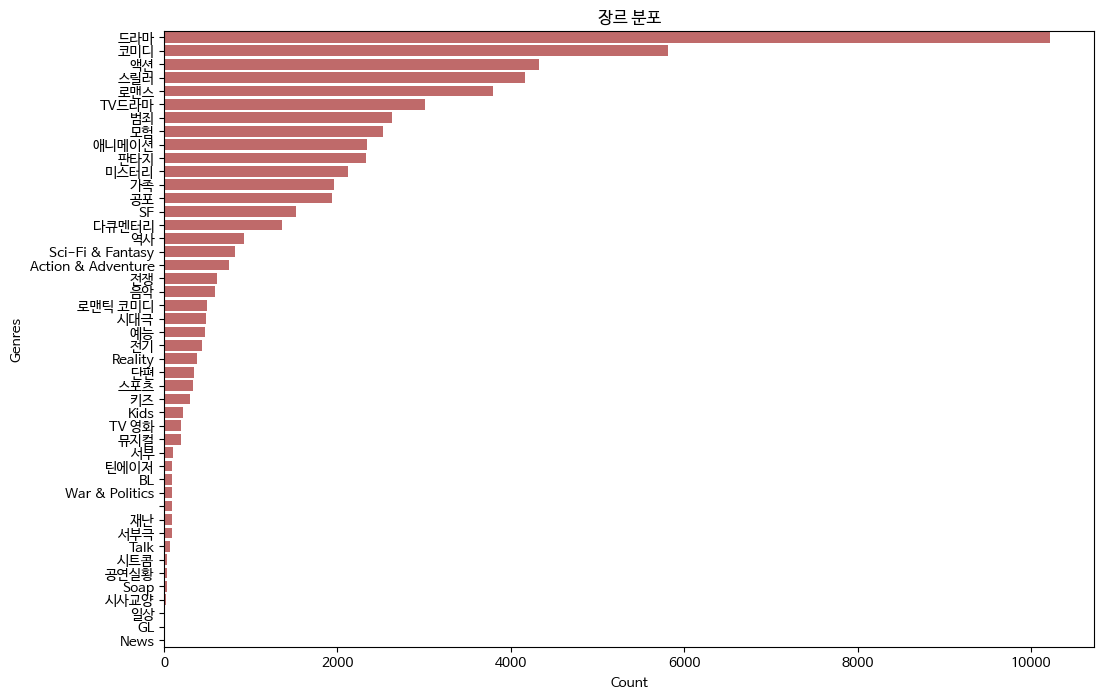

In [16]:
# 장르 분포 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x = 'Count', y = 'Genre', data = genre_df, color = 'indianred')
plt.title('장르 분포')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

- 복합 장르를 단일 장르로 변환하여 빈도를 확인했습니다.
- 드라마, 코미디, 액션, 스릴러, 로맨스, TV드라마, 범죄, 모험, 애니메이션, 판타지 등 빈도가 높은 장르는 대중적인 장르라는 사실을 확인할 수 있었습니다.

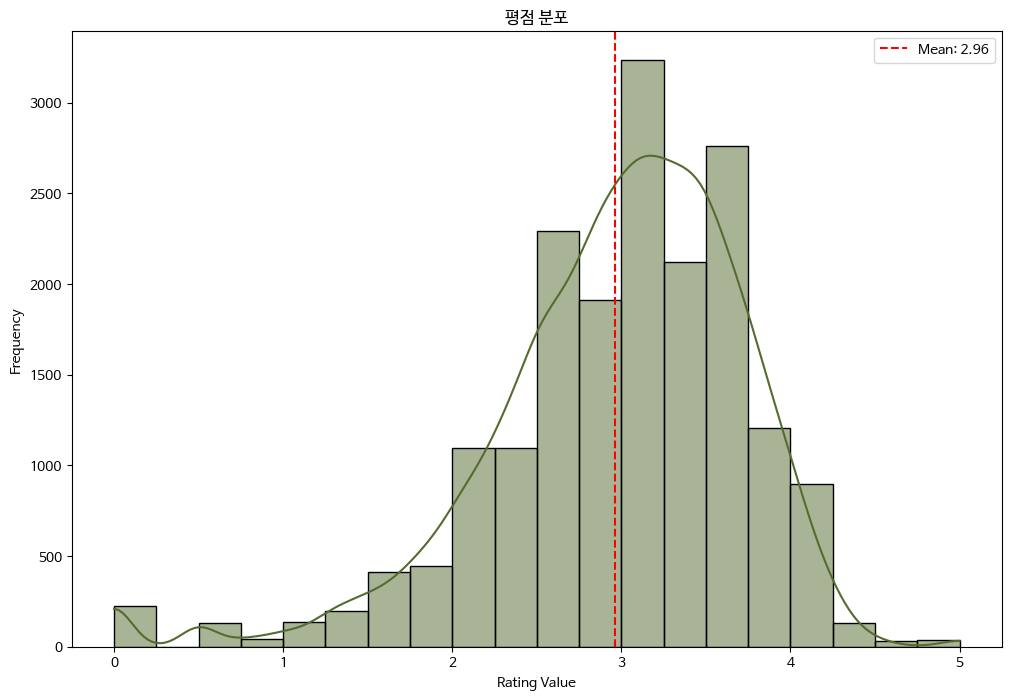

In [17]:
# 평점 분포
mean_rating = data_selected['Rating Value'].mean()

plt.figure(figsize=(12, 8))
sns.histplot(data_selected['Rating Value'], bins=20, kde=True, color='darkolivegreen')
plt.axvline(mean_rating, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_rating:.2f}')
plt.title('평점 분포')
plt.xlabel('Rating Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

- 평점의 대부분은 2.5에서 3.75 사이에 집중되어 있음을 확인할 수 있습니다.
- 평균 평점은 약 2.96로, 전체적으로 보통 수준의 평점을 받고 있는 콘텐츠가 많습니다.
- 이는 사용자들이 대부분 중간 정도의 만족도를 표현하고 있음을 나타냅니다.
- 극단적으로 낮거나 높은 평점은 적습니다.

In [18]:
# 복합 국가를 개별 국가로 분리
all_countries = data_selected['Origin Country'].str.split(', ')
flat_countries = [country for sublist in all_countries for country in sublist]

# 개별 국가의 빈도 계산
country_counts = Counter(flat_countries)

# 개별 국가의 빈도를 DataFrame으로 변환
country_df = pd.DataFrame(country_counts.items(), columns=['Country', 'Count']).sort_values(by='Count', ascending=False)

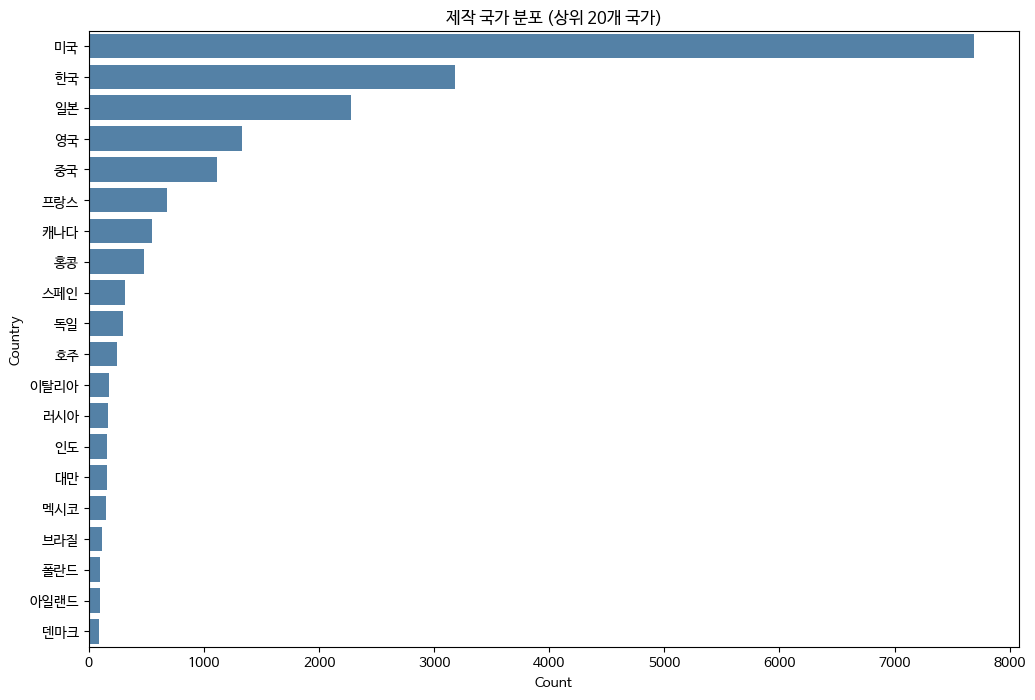

In [19]:
# 상위 20개 제작 국가 분포
top_20_countries = country_df.head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Country', data=top_20_countries, color = 'steelblue')
plt.title('제작 국가 분포 (상위 20개 국가)')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

- 다양한 국가에서 제작된 콘텐츠가 데이터를 구성하고 있음을 확인할 수 있습니다.
- 그 중에서 미국과 한국에서 제작된 콘텐츠가 많은 비중을 차지한다는 사실도 알 수 있습니다.
- 이는 우리나라에서 소비되는 콘텐츠의 경향성과 유사하며, 다양한 국가에서 제작된 콘텐츠와 우리나라에서 많이 소비되는 콘텐츠의 특성을 모두 적절히 반영하는 것입니다.

In [20]:
# 복합 Providers를 개별 Providers로 분리
all_providers = data_selected['Providers'].str.split(', ')
flat_providers = [provider for sublist in all_providers for provider in sublist]

# 개별 Providers의 빈도 계산
provider_counts = Counter(flat_providers)

# 개별 Providers의 빈도를 데이터프레임으로 변환
provider_df = pd.DataFrame(provider_counts.items(), columns=['Provider', 'Count']).sort_values(by='Count', ascending=False)

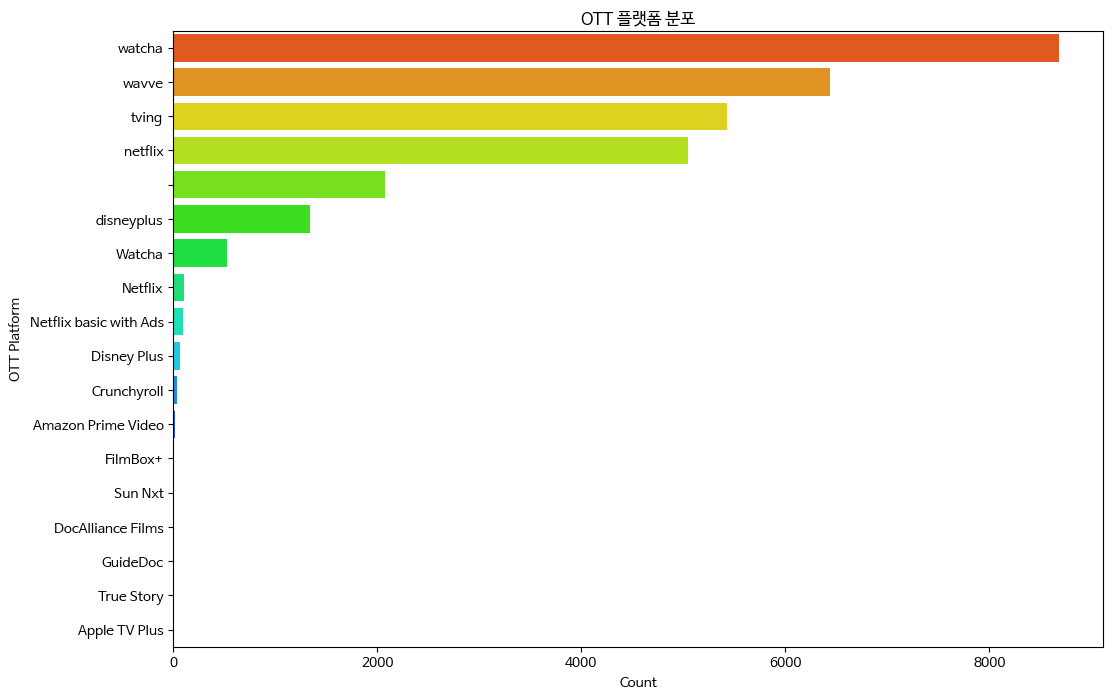

In [21]:
# OTT Platform 분포 시각화
palette = sns.color_palette("hsv", len(provider_df))
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Provider', data=provider_df, hue='Provider', dodge=False, palette=palette, legend=False)
plt.title('OTT 플랫폼 분포')
plt.xlabel('Count')
plt.ylabel('OTT Platform')
plt.show()

- Watcha, Wavve, Tving, Netflix, Disneyplus와 같은 주요 OTT 플랫폼이 많이 사용되고 있습니다.
- Watcha와 Wavve가 특히 많은 콘텐츠를 제공하고 있습니다.
- 이는 이들 플랫폼이 사용자들에게 인기가 많으며, 다양한 콘텐츠를 보유하고 있음을 의미합니다.

# Clustering

In [22]:
!pip install tensorflow==2.9.0
!pip install tensorflow-text==2.9.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 82.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 95.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 101.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 52.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 24.3.25
    Uninstalling flatbuffers-24.3.25:
      Successfully uninstalled flatbuffers-24.3.25
  Attempting uninstall: te

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 48.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of tf-keras to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 74.6 MB/s eta 0:00:00
  Attempting uninstall: tf-keras
    Found existing installation: tf_keras 2.15.1
    Uninstalling tf_keras-2.15.1:
      Successfully uninstalled tf_keras-2.15.1


In [27]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from concurrent.futures import ThreadPoolExecutor
import re

In [29]:
mbti = pd.read_csv('/content/MBTI 500.csv')
mbti.head()

posts  type
0  know intj tool use interaction people excuse a...  INTJ
1  rap music ehh opp yeah know valid well know fa...  INTJ
2  preferably p hd low except wew lad video p min...  INTJ
3  drink like wish could drink red wine give head...  INTJ
4  space program ah bad deal meing freelance max ...  INTJ

In [30]:
print(mbti.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105113 entries, 0 to 105112
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   posts   105113 non-null  object
 1   type    105113 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB
None


In [31]:
data['Overview'].head(30)

0     무능력하고 무표정한 얼굴의 엄마와 계부의 생활비를 위해 매일같이 성냥공장에서 기계처...
1     고아이지만 언제나 밝은 주디와 그런 주디를 도와주는 후견인 '키다리 아저씨'의 사랑...
2     재벌가 도련님 임보생은 재산 상속권을 조건으로 육촌 동생 진옥선과의 혼인을 강요당한...
3     1940년대 초, 일본의 침공으로 전 중국이 혼란에 빠져있을 무렵, 중국내 일본의 ...
4     네바다주 사막 한 가운데 있는 작은 마을에는 20명도 안되는 주민들이 서로 도우며 ...
5     아내와 별거 중인 젊은 도시 감각파 알렉스는 매력적인 젊은 사진 작가 조와 우연히 ...
6     첫번째 이야기:  검은 고양이를 애지중지 키우는 부인을 괴롭히기 위해 고양이를 잔혹...
7     다크 엔젤이라 불리는 거대한 에일리언 탈랙은 살인 병기로 사람을 죽이고는 인간의 뇌...
8     어느날 강남 테헤란로에서 포장마차 부부를 치어 죽이고 뺑소니를 친 사고가 일어난다....
9     미국에 사는 아우는 장가를 가기 위해 홍콩 경찰인 삼촌 익연을 찾아온다. 아우는 우...
10    하수는 시골의 조그마한 식당에서 종업원으로 일을 한다. 그리고 주인의 딸인 오군여와...
11    죽음의 도시 미디언은 인류의 악몽 속에 살아 숨쉬는 지하도시. 분은 매일밤 미디언과...
12    뒷골목의 불량 소녀 니키타는 정체가 분명치 않은 비밀 정보기관에서 전문 킬러로 양성...
13    시베리아에서 부는 찬 바람이 매섭게 스치는 소련의 잠수함 기지(Soyiet Sub ...
14    일탈에 대한 호기심이 빠져나올 수 없는 파멸의 길로 이어지는 이야기.\r\n 마이클...
15    육군사관학교 소년생 25명을 태운 비행기가 바다에 추락한다. 랄프(발타자 게티)는 ...
16    사기꾼 브라이언과 찰리는 마약밀매 자금을 훔쳐 달아난다. 중국갱과 보스에게 쫓기던 ...
17    경찰 학교를 갓 졸업한 터너는 첫 근무날 잡화점 강도 사건을 목격하고 범인과

In [32]:
# LaBSE 모델 로드
encoder = hub.KerasLayer("https://tfhub.dev/jeongukjae/smaller_LaBSE_15lang/1")
preprocessor = hub.KerasLayer("https://tfhub.dev/jeongukjae/smaller_LaBSE_15lang_preprocess/1")

# 텍스트를 고차원 벡터로 인코딩하는 모델 구성
def build_embedding_model():
    sentences = tf.keras.layers.Input(shape=(), dtype=tf.string, name="sentences")
    encoder_inputs = preprocessor(sentences)
    sentence_representation = encoder(encoder_inputs)["pooled_output"]
    normalized_sentence_representation = tf.nn.l2_normalize(sentence_representation, axis=-1)  # for cosine similarity
    return tf.keras.Model(sentences, normalized_sentence_representation)

embedding_model = build_embedding_model()
embedding_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 sentences (InputLayer)         [(None,)]            0           []                               
                                                                                                  
 keras_layer_1 (KerasLayer)     {'input_type_ids':   0           ['sentences[0][0]']              
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                      

In [33]:
# 텍스트 임베딩 함수
def embed_texts(texts, batch_size=32):
    embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        batch_tensors = tf.constant(batch_texts)
        batch_embeddings = embedding_model(batch_tensors).numpy()
        embeddings.extend(batch_embeddings)
    return embeddings

In [34]:
# MBTI 임베딩
mbti_posts = mbti.groupby('type')['posts'].apply(lambda posts: ' '.join(posts)).tolist()
mbti_embeddings = embed_texts(mbti_posts)
mbti_index = mbti.groupby('type').groups.keys()
mbti_embeddings_dict = dict(zip(mbti_index, mbti_embeddings))

# 콘텐츠 줄거리 임베딩
contents_texts = data_selected['Overview'].tolist()
contents_embeddings = embed_texts(contents_texts)
contents_index = data_selected['Title'].tolist()
contents_embeddings_dict = dict(zip(contents_index, contents_embeddings))

In [35]:
import pickle

# MBTI 임베딩 로드
with open('mbti_embeddings_dict.pkl', 'rb') as f:
    mbti_embeddings_dict = pickle.load(f)

# 콘텐츠 임베딩 로드
with open('contents_embeddings_dict_0612.pkl', 'rb') as f:
    contents_embeddings_dict = pickle.load(f)

In [36]:
# 데이터 스케일링
scaler = StandardScaler()
contents_embedding_list_scaled = scaler.fit_transform(contents_embeddings)

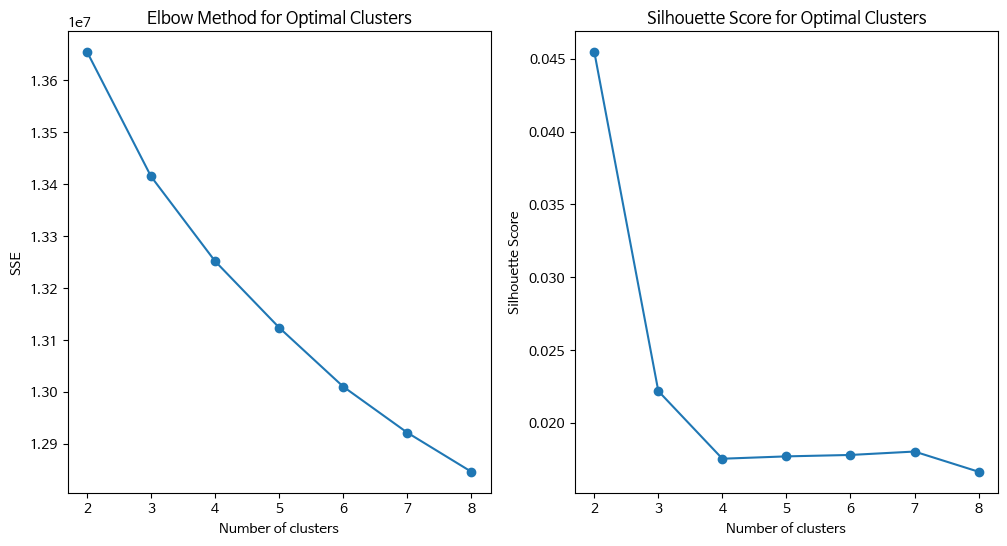

In [37]:
# 엘보우 방법과 실루엣 점수를 사용하여 최적의 클러스터 수 찾기
def find_optimal_clusters(data, max_k):
    sse = []
    silhouette_scores = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = kmeans.fit_predict(data)
        sse.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, labels))
    return sse, silhouette_scores

max_k = 8  # 최대 클러스터 수
sse, silhouette_scores = find_optimal_clusters(contents_embedding_list_scaled, max_k)

# 시각화
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(range(2, max_k+1), sse, marker='o')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('SSE')
ax[0].set_title('Elbow Method for Optimal Clusters')

ax[1].plot(range(2, max_k+1), silhouette_scores, marker='o')
ax[1].set_xlabel('Number of clusters')
ax[1].set_ylabel('Silhouette Score')
ax[1].set_title('Silhouette Score for Optimal Clusters')
plt.show()

1. Elbow Method
- SSE 값이 클러스터 수 증가에 따라 점진적으로 감소하는 것을 확인할 수 있습니다.
- 엘보우 지점은 보통 SSE 감소율이 급격히 완화되는 지점입니다.
- 엘보우 메서드 그래프에서 SSE 감소율이 급격히 완화되는 지점은 보이지 않습니다.
- 다만, 기울기가 상대적으로 크게 나타나는 2, 3, 4 클러스터 사이에서 엘보우가 나타나는 것으로 보입니다.

2. Silhouette Score
- 실루엣 스코어는 클러스터 품질을 나타내며, 값이 높을수록 클러스터 품질이 좋습니다.
- 2 클러스터에서 가장 높은 실루엣 스코어를 보이지만, 이는 클러스터 수가 적기 때문이라고 볼 수 있습니다.
- 이후 클러스터 수가 증가해도 실루엣 스코어가 크게 개선되지 않습니다.

3. The number of Optimal Clusters
- 엘보우 메서드와 실루엣 스코어를 종합적으로 고려할 때, 3이나 4개의 클러스터가 적절해 보입니다.
- 3개의 클러스터는 실루엣 스코어가 급격히 떨어진 이후 상대적으로 안정된 값을 유지하고, 엘보우 방법에서도 감소율이 완화되는 지점입니다.
- 추가 클러스터가 클러스터 품질의 향상에 기여한다면, 4개의 클러스터도 고려할 수 있습니다.

**t-SNE를 사용한 K-means 클러스터링 시각화**

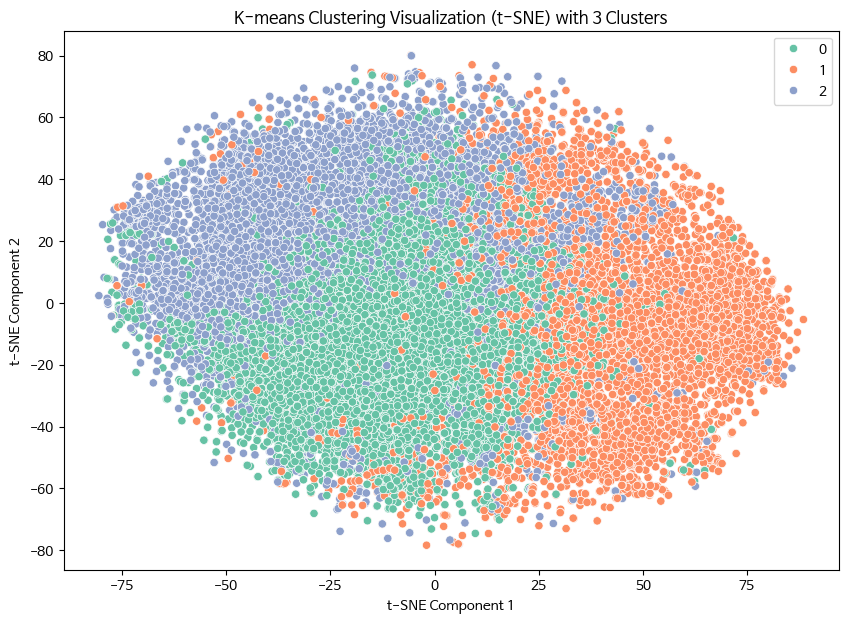

In [38]:
# 클러스터 수 3개로 K-means 클러스터링 수행
optimal_clusters_3 = 3
kmeans_3 = KMeans(n_clusters=optimal_clusters_3, random_state=42, n_init=10)
kmeans_labels_3 = kmeans_3.fit_predict(contents_embedding_list_scaled)

# 각 콘텐츠에 군집 라벨 할당
labeled_contents_3 = pd.Series(kmeans_labels_3, index=contents_index)

# t-SNE를 사용하여 2차원으로 축소 및 시각화
tsne_3 = TSNE(n_components=2, random_state=42)
contents_embedding_2d_3 = tsne_3.fit_transform(contents_embedding_list_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=contents_embedding_2d_3[:, 0], y=contents_embedding_2d_3[:, 1], hue=kmeans_labels_3, palette='Set2')
plt.title('K-means Clustering Visualization (t-SNE) with 3 Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [49]:
# 각 MBTI 유형이 속하는 콘텐츠 군집 찾기
mbti_to_cluster_3 = {}
for mbti_type, mbti_embedding in mbti_embeddings_dict.items():
    similarities = cosine_similarity([mbti_embedding], contents_embeddings)
    closest_contents_idx = np.argmax(similarities)
    mbti_to_cluster_3[mbti_type] = labeled_contents_3.iloc[closest_contents_idx]

# MBTI 유형별 콘텐츠 군집 출력
print("MBTI 유형과 3개의 클러스터:")
for mbti_type, cluster in mbti_to_cluster_3.items():
    print(f"MBTI 유형 {mbti_type}는 군집 {cluster}에 속합니다.")

MBTI 유형과 3개의 클러스터:
MBTI 유형 ENFJ는 군집 0에 속합니다.
MBTI 유형 ENFP는 군집 0에 속합니다.
MBTI 유형 ENTJ는 군집 2에 속합니다.
MBTI 유형 ENTP는 군집 0에 속합니다.
MBTI 유형 ESFJ는 군집 0에 속합니다.
MBTI 유형 ESFP는 군집 1에 속합니다.
MBTI 유형 ESTJ는 군집 0에 속합니다.
MBTI 유형 ESTP는 군집 0에 속합니다.
MBTI 유형 INFJ는 군집 0에 속합니다.
MBTI 유형 INFP는 군집 0에 속합니다.
MBTI 유형 INTJ는 군집 0에 속합니다.
MBTI 유형 INTP는 군집 2에 속합니다.
MBTI 유형 ISFJ는 군집 0에 속합니다.
MBTI 유형 ISFP는 군집 0에 속합니다.
MBTI 유형 ISTJ는 군집 2에 속합니다.
MBTI 유형 ISTP는 군집 0에 속합니다.


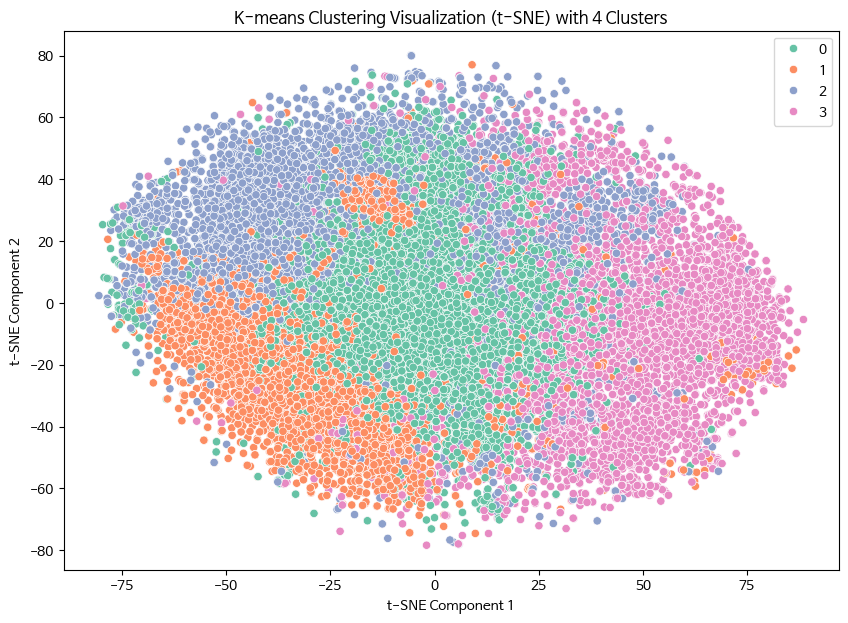

In [40]:
# 클러스터 수 4개로 K-means 클러스터링 수행
optimal_clusters_4 = 4
kmeans_4 = KMeans(n_clusters=optimal_clusters_4, random_state=42, n_init=10)
kmeans_labels_4 = kmeans_4.fit_predict(contents_embedding_list_scaled)

# 각 콘텐츠에 군집 라벨 할당
labeled_contents_4 = pd.Series(kmeans_labels_4, index=contents_index)

# t-SNE를 사용하여 2차원으로 축소 및 시각화
tsne_4 = TSNE(n_components=2, random_state=42)
contents_embedding_2d_4 = tsne_4.fit_transform(contents_embedding_list_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=contents_embedding_2d_4[:, 0], y=contents_embedding_2d_4[:, 1], hue=kmeans_labels_4, palette='Set2')
plt.title('K-means Clustering Visualization (t-SNE) with 4 Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

In [50]:
# 각 MBTI 유형이 속하는 콘텐츠 군집 찾기
mbti_to_cluster_4 = {}
for mbti_type, mbti_embedding in mbti_embeddings_dict.items():
    similarities = cosine_similarity([mbti_embedding], contents_embeddings)
    closest_contents_idx = np.argmax(similarities)
    mbti_to_cluster_4[mbti_type] = labeled_contents_4.iloc[closest_contents_idx]

# MBTI 유형별 콘텐츠 군집 출력
print("MBTI 유형과 4개의 클러스터:")
for mbti_type, cluster in mbti_to_cluster_4.items():
    print(f"MBTI 유형 {mbti_type}는 군집 {cluster}에 속합니다.")

MBTI 유형과 4개의 클러스터:
MBTI 유형 ENFJ는 군집 1에 속합니다.
MBTI 유형 ENFP는 군집 0에 속합니다.
MBTI 유형 ENTJ는 군집 0에 속합니다.
MBTI 유형 ENTP는 군집 0에 속합니다.
MBTI 유형 ESFJ는 군집 1에 속합니다.
MBTI 유형 ESFP는 군집 3에 속합니다.
MBTI 유형 ESTJ는 군집 0에 속합니다.
MBTI 유형 ESTP는 군집 1에 속합니다.
MBTI 유형 INFJ는 군집 0에 속합니다.
MBTI 유형 INFP는 군집 0에 속합니다.
MBTI 유형 INTJ는 군집 0에 속합니다.
MBTI 유형 INTP는 군집 2에 속합니다.
MBTI 유형 ISFJ는 군집 0에 속합니다.
MBTI 유형 ISFP는 군집 0에 속합니다.
MBTI 유형 ISTJ는 군집 1에 속합니다.
MBTI 유형 ISTP는 군집 0에 속합니다.


**1. 3개의 클러스터 (k=3)**
- 클러스터 0: 대부분의 MBTI 유형 (예: ENFJ, ENFP, ENTP, ESFJ, ESTJ, ESTP, INFJ, INFP,  INTJ, ISFJ, ISFP, ISTP) 이 속합니다.
- 클러스터 1: ESFP 유형이 속합니다.
- 클러스터 2: 주로 ISTJ, ENTJ, INTP와 같은 유형이 속합니다.

- 클러스터 0가 대부분의 MBTI 유형을 포함하고 있으며, 클러스터 1과 클러스터 2은 상대적으로 소수의 유형을 포함하고 있습니다.
- 이는 t-SNE의 차원 축소 및 K-means 클러스터링이 고차원 데이터의 복잡성을 충분히 반영하지 못했을 가능성을 시사합니다.
- 클러스터 2는 주로 논리적이고 분석적인 성향이 강한 유형을 포함하는 반면, 클러스터 0과 클러스터 1은 감각적이고 실용적인 성향이 강한 유형을 포함합니다.


**2. 4개의 클러스터 (k=4)**
- 클러스터 0: ENFP, ENTJ, ENTP, ESTJ, INFJ, INFP, INTJ, ISFJ, ISFP, ISTP 등의 다양한 유형이 속합니다.
- 클러스터 1: ENFJ, ESFJ, ESTP, ISTJ 등의 유형이 속합니다.
- 클러스터 2: INTP 유형이 속합니다.
- 클러스터 3: ESFP 유형이 속합니다.

- 클러스터 0은 여전히 많은 MBTI 유형을 포함하고 있습니다.
- 이는 클러스터의 세분화가 더 필요할 수 있음을 시사합니다.
- 3개의 군집으로 나눴을 때보다는 MBTI 유형을 더 세분화시켜 군집화할 수 있었지만, 여전히 t-SNE의 차원 축소 및 K-means 클러스터링이 고차원 데이터의 복잡성을 충분히 반영하지 못하는 한계를 확인할 수 있었습니다.


**3. 결론**
- 줄거리를 기반으로 콘텐츠를 클러스터링하고 각 군집에 MBTI 유형을 매칭(라벨링)할 수 있다는 것을 확인할 수 있었습니다.
- 하지만 16개의 MBTI 유형의 특성을 반영하기에는 어려움이 있다는 사실을 알 수 있었습니다.
- 그래서 각 MBTI 유형과 유사한 콘텐츠를 코사인 유사도를 기반으로 찾는 방법이 더 적합하다는 결론을 얻을 수 있었습니다.

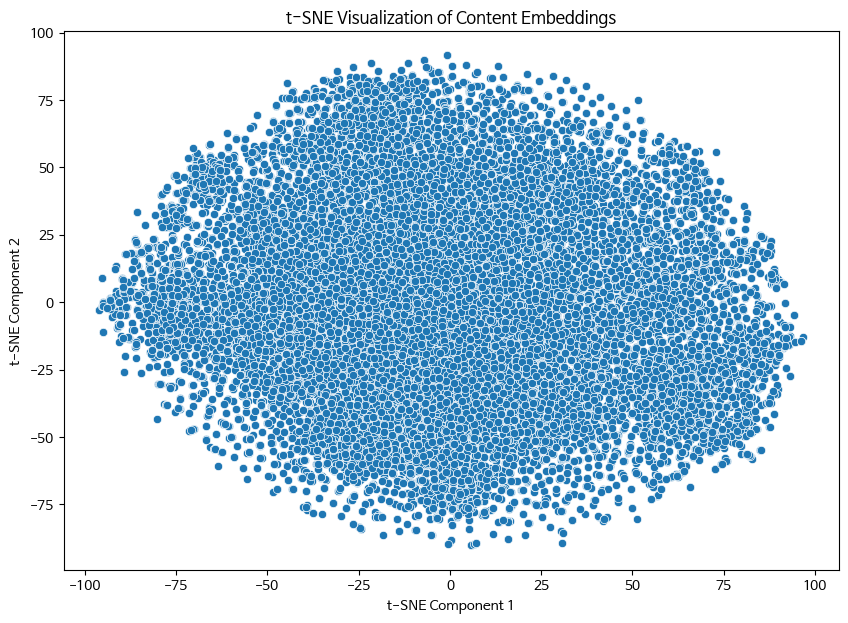

In [42]:
# t-SNE를 사용하여 줄거리 임베딩 시각화
tsne_content = TSNE(n_components=2, random_state=42, perplexity=10)
content_embeddings_2d = tsne_content.fit_transform(np.array(contents_embeddings))
plt.figure(figsize=(10, 7))
sns.scatterplot(x=content_embeddings_2d[:, 0], y=content_embeddings_2d[:, 1])
plt.title('t-SNE Visualization of Content Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

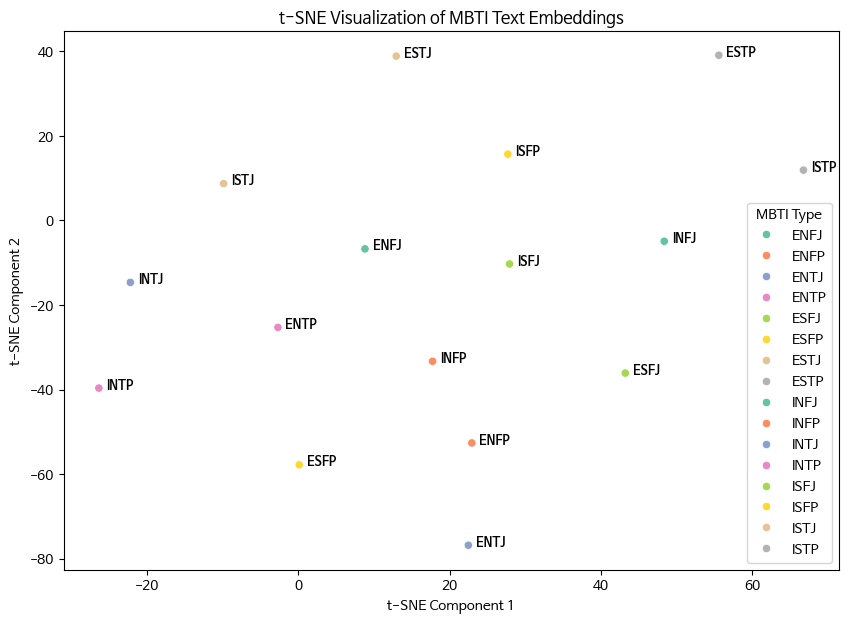

In [43]:
# t-SNE를 사용하여 MBTI 텍스트 임베딩 시각화
tsne_mbti = TSNE(n_components=2, random_state=42, perplexity=10)
mbti_embeddings_2d = tsne_mbti.fit_transform(np.array(mbti_embeddings))
plt.figure(figsize=(10, 7))
sns.scatterplot(x=mbti_embeddings_2d[:, 0], y=mbti_embeddings_2d[:, 1], hue=list(mbti_index), palette='Set2')
plt.title('t-SNE Visualization of MBTI Text Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='MBTI Type')

# 각 MBTI 유형의 이름을 좌표에 추가
for i, txt in enumerate(mbti_index):
    plt.text(mbti_embeddings_2d[i, 0] + 1, mbti_embeddings_2d[i, 1], txt, fontsize=9, weight='bold')

plt.show()

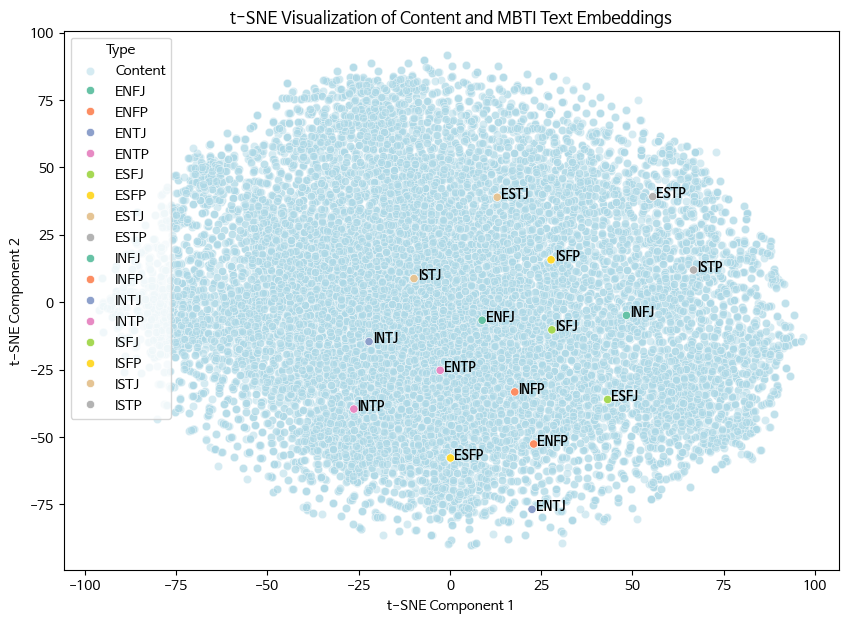

In [44]:
# 개별 t-SNE 변환
tsne_content = TSNE(n_components=2, random_state=42, perplexity=10)
content_2d = tsne_content.fit_transform(np.array(contents_embeddings))

tsne_mbti = TSNE(n_components=2, random_state=42, perplexity=10)
mbti_2d = tsne_mbti.fit_transform(np.array(mbti_embeddings))

plt.figure(figsize=(10, 7))

# 줄거리 임베딩 시각화
sns.scatterplot(x=content_2d[:, 0], y=content_2d[:, 1], label='Content', color='lightblue', alpha=0.5)

# MBTI 텍스트 임베딩 시각화
sns.scatterplot(x=mbti_2d[:, 0], y=mbti_2d[:, 1], hue=list(mbti_index), palette='Set2')

# 각 MBTI 유형의 이름을 좌표에 추가
for i, txt in enumerate(mbti_index):
    plt.text(mbti_2d[i, 0] + 1, mbti_2d[i, 1], txt, fontsize=9, weight='bold')

plt.title('t-SNE Visualization of Content and MBTI Text Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# 레전드 추가 (중복 제거)
handles, labels = plt.gca().get_legend_handles_labels()
unique_handles_labels = dict(zip(labels, handles))
plt.legend(unique_handles_labels.values(), unique_handles_labels.keys(), title='Type')

plt.show()

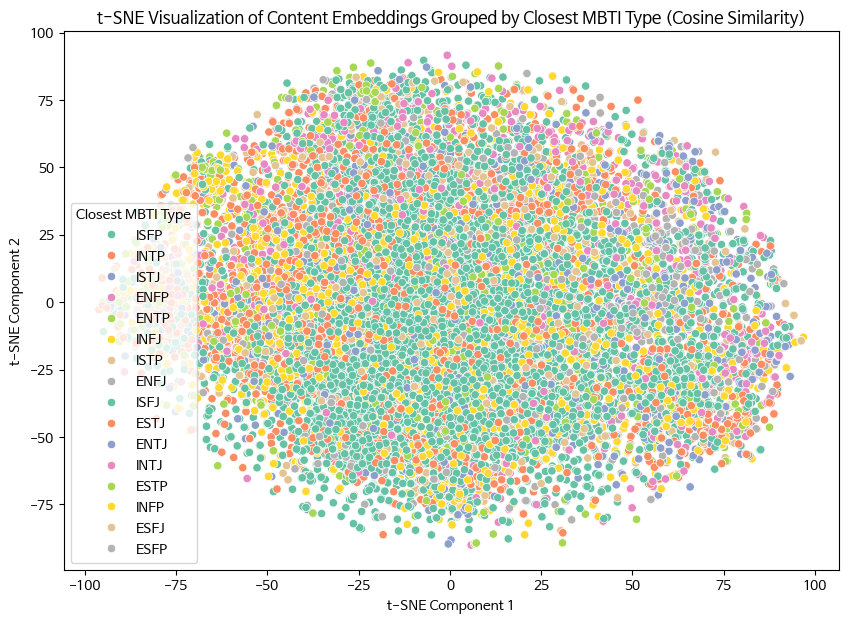

In [45]:
# 코사인 유사도를 사용하여 가장 가까운 MBTI 유형 찾기
similarity_matrix = cosine_similarity(contents_embeddings, mbti_embeddings)
closest_indices = np.argmax(similarity_matrix, axis=1)
closest_mbti_labels = [list(mbti_index)[i] for i in closest_indices]

# t-SNE를 사용하여 콘텐츠 임베딩 시각화
plt.figure(figsize=(10, 7))
sns.scatterplot(x=content_2d[:, 0], y=content_2d[:, 1], hue=closest_mbti_labels, palette='Set2', legend='full')
plt.title('t-SNE Visualization of Content Embeddings Grouped by Closest MBTI Type (Cosine Similarity)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Closest MBTI Type')
plt.show()

In [46]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.4 MB/s eta 0:00:00


In [47]:
!pip install plotly

In [48]:
import umap
import plotly.express as px

# UMAP 변환 (3차원)
umap_model = umap.UMAP(n_components=3, random_state=42)
content_3d = umap_model.fit_transform(contents_embeddings)
mbti_3d = umap_model.fit_transform(mbti_embeddings)

# 코사인 유사도를 사용하여 가장 가까운 MBTI 유형 찾기
similarity_matrix = cosine_similarity(contents_embeddings, mbti_embeddings)
closest_indices = np.argmax(similarity_matrix, axis=1)
closest_mbti_labels = [list(mbti_index)[i] for i in closest_indices]

# 콘텐츠 임베딩을 3D로 시각화
fig_content = px.scatter_3d(
    x=content_3d[:, 0],
    y=content_3d[:, 1],
    z=content_3d[:, 2],
    color=closest_mbti_labels,
    title='UMAP 3D Visualization of Content Embeddings Grouped by Closest MBTI Type (Cosine Similarity)',
    labels={'x': 'UMAP Component 1', 'y': 'UMAP Component 2', 'z': 'UMAP Component 3'}
)

fig_content.update_traces(marker=dict(size=3))
fig_content.show()

# HTML 파일로 저장
fig_content.write_html("content_embeddings_3d.html")

# MBTI 텍스트 임베딩을 3D로 시각화
fig_mbti = px.scatter_3d(
    x=mbti_3d[:, 0],
    y=mbti_3d[:, 1],
    z=mbti_3d[:, 2],
    color=list(mbti_index),
    title='UMAP 3D Visualization of MBTI Text Embeddings',
    labels={'x': 'UMAP Component 1', 'y': 'UMAP Component 2', 'z': 'UMAP Component 3'}
)

fig_mbti.update_traces(marker=dict(size=5))
fig_mbti.show()

# HTML 파일로 저장
fig_mbti.write_html("mbti_embeddings_3d.html")

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


**1. UMAP 3D Visualization of MBTI Text Embeddings**
- 이 시각화는 각 MBTI 유형에 해당하는 텍스트 임베딩을 3D UMAP으로 축소한 결과입니다. 각 점은 특정 MBTI 유형을 나타내며, 서로 다른 색상으로 표시됩니다.
- MBTI 유형에 따라 서로 다른 클러스터가 형성되었으며, 이는 각 유형의 텍스트 특성이 다름을 시사합니다.
- **특성 차이 반영**: 시각화 결과는 MBTI 유형 간의 명확한 특성 차이를 반영하고 있습니다. 이는 특정 MBTI 유형이 특정한 언어적 패턴이나 주제를 가지고 있음을 보여줍니다.
- **유형별 군집**: MBTI 유형에 따라 군집이 형성되는 것은, 각 유형이 특정한 주제나 표현 방식을 선호함을 나타냅니다. 이는 각 MBTI 유형에 맞는 콘텐츠를 추천하는 데 중요한 근거가 된다는 것을 의미합니다.

**2. UMAP 3D Visualization of Content Embeddings Grouped by Closest MBTI Type (Cosine Similarity)**
- 이 시각화는 콘텐츠 임베딩을 3D UMAP으로 축소한 후, 코사인 유사도를 사용하여 가장 가까운 MBTI 유형과 그룹화한 결과입니다.
- 각 점은 콘텐츠를 나타내며, 색상은 해당 콘텐츠가 가장 가까운 MBTI 유형을 나타냅니다.
- **유사도 기반 그룹화**: 코사인 유사도를 사용하여 콘텐츠를 MBTI 유형별로 그룹화한 결과, 콘텐츠 임베딩이 해당 MBTI 유형과 밀접하게 연관되어 있음을 보여줍니다.
- **추천의 정확성**: 코사인 유사도를 사용해 MBTI 유형별로 콘텐츠를 그룹화함으로써, 각 유형의 사용자에게 적합한 콘텐츠를 더 정확하게 추천할 수 있습니다.
- **다양한 유형 반영**: 시각화 결과는 여러 MBTI 유형에 맞는 다양한 콘텐츠가 존재함을 보여줍니다. 이는 개인의 MBTI 유형에 따라 맞춤형 콘텐츠 추천이 가능함을 시사합니다.


**3. 결론**
- 사용자의 MBTI 유형을 기반으로 개인화된 콘텐츠 추천이 가능하다는 결론을 도출할 수 있었습니다.
- 이는 콜드-스타트(Cold-Start) 문제를 해결할 수 있으며, 콘텐츠의 메타 데이터와 사용자의 특성 모두 반영한 하이브리드 추천이 가능하다는 점을 의미합니다.
- 시각화 결과는 MBTI 유형 간의 특성 차이와 콘텐츠 간의 유사성을 명확히 보여주며, 코사인 유사도를 사용한 그룹화는 추천의 정확성을 높입니다.
- 사용자의 성향에 맞는 콘텐츠를 효과적으로 추천 가능한 추천 로직을 구현할 수 있으며, 사용자 만족도 높은 추천이 가능합니다.